In [42]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv('adult_cleaned_final.csv')

In [44]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K


In [45]:
summary_statistics = data.describe(include = 'all')
summary_statistics

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,31980.000000,31980,31980.000000,31980,31980.000000,31980,31980,31980,31980,31980,31980.000000,31980.000000,31980.000000,31980,31980
unique,NaN,7,NaN,14,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,23964,NaN,11088,NaN,15546,4901,13870,27387,22064,NaN,NaN,NaN,29297,23599
mean,38.836429,NaN,180867.365447,NaN,10.205253,NaN,NaN,NaN,NaN,NaN,1000.207004,90.842433,41.626454,NaN,NaN
std,11.919038,NaN,87128.098495,NaN,2.426458,NaN,NaN,NaN,NaN,NaN,6749.631272,408.246715,4.051591,NaN,NaN
min,17.000000,NaN,13769.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,33.000000,NaN,NaN
25%,29.000000,NaN,116991.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,38.000000,NaN,176716.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,230406.500000,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,43.000000,NaN,NaN


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

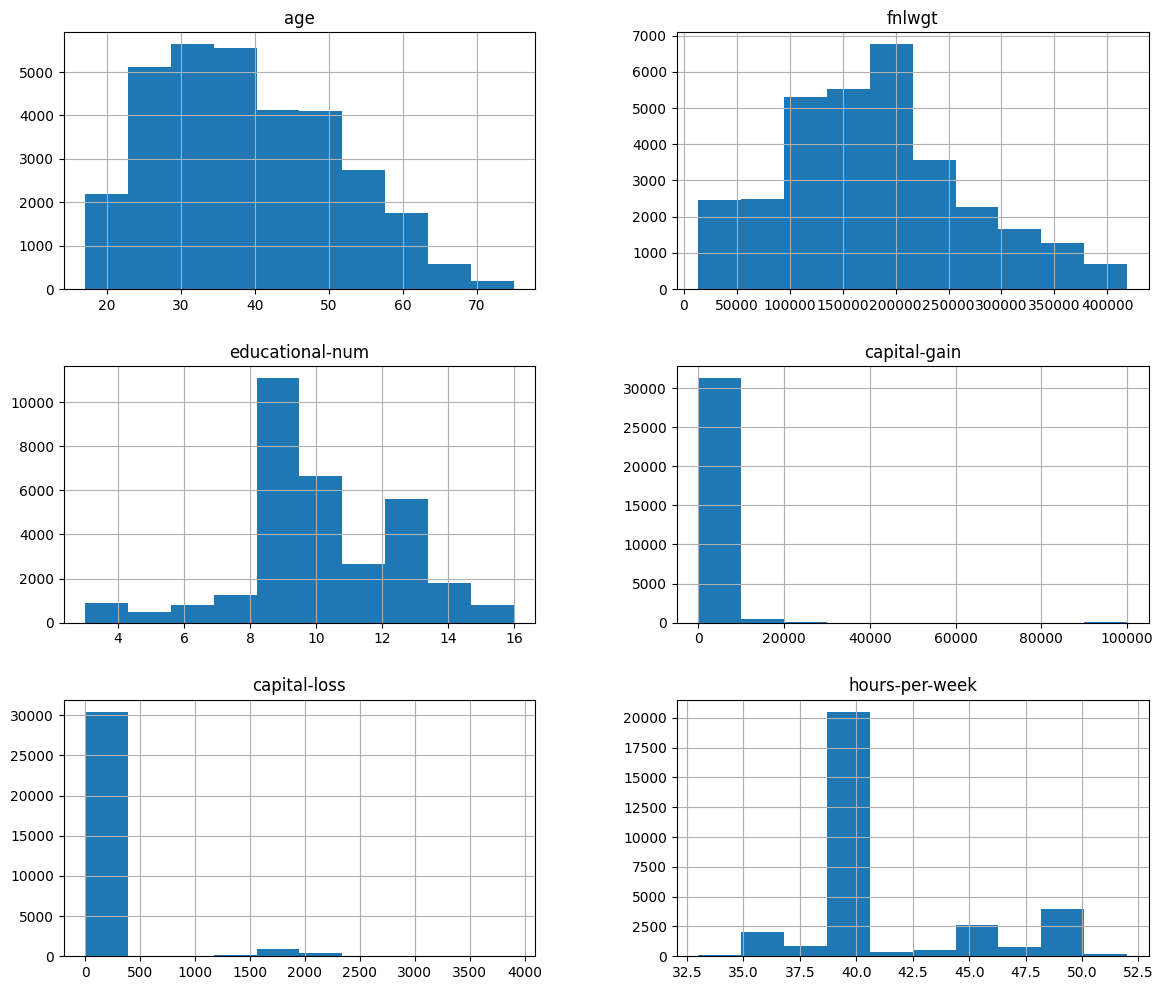

In [47]:
data.hist(figsize=(14, 12))
plt.show()

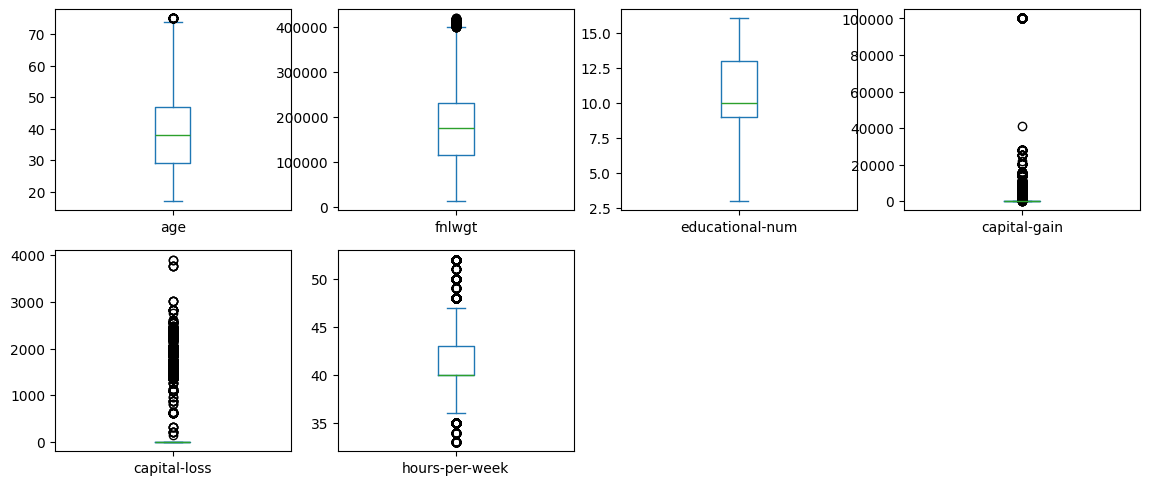

In [48]:
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,12))
plt.show()

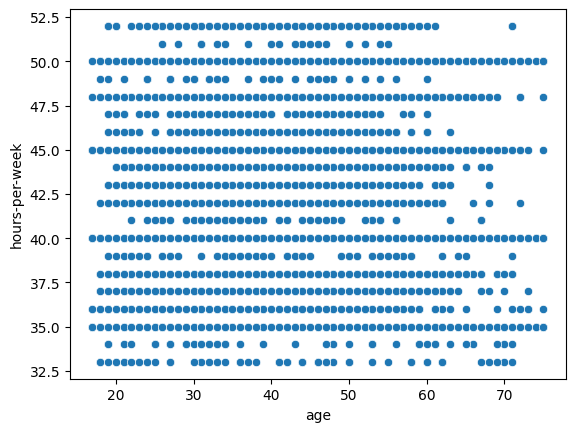

In [49]:
sns.scatterplot(x='age', y='hours-per-week', data=data)
plt.show()

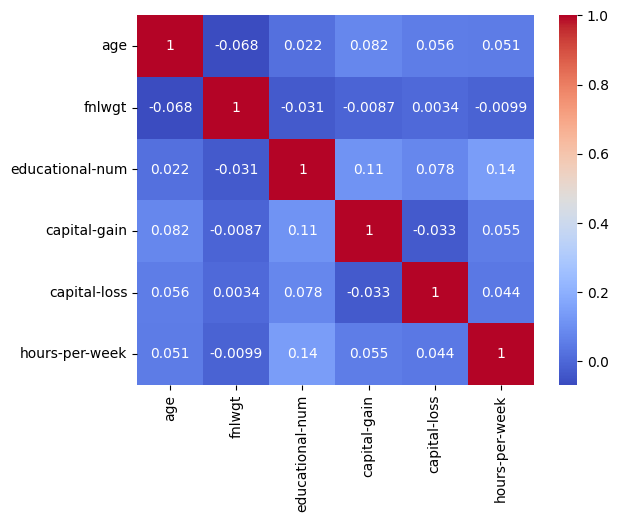

In [50]:
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [51]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [52]:
ttest_result = stats.ttest_ind(data[data['income'] == '<=50K']['age'],
                               data[data['income'] == '>50K']['age'])
print("T-test result:\n", ttest_result)

T-test result:
 TtestResult(statistic=-45.88621167138595, pvalue=0.0, df=31978.0)


In [53]:
anova_result = ols('age ~ C(income)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print("ANOVA table:\n", anova_table)

ANOVA table:
                  sum_sq       df            F  PR(>F)
C(income)  2.806512e+05      1.0  2105.544422     0.0
Residual   4.262396e+06  31978.0          NaN     NaN


In [54]:
X = data[['age', 'educational-num', 'hours-per-week']]
y = data['fnlwgt']
X = sm.add_constant(X)

In [55]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 fnlwgt   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     59.09
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           4.37e-38
Time:                        05:43:24   Log-Likelihood:            -4.0907e+05
No. Observations:               31980   AIC:                         8.181e+05
Df Residuals:                   31976   BIC:                         8.182e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.127e+05   5354.422     

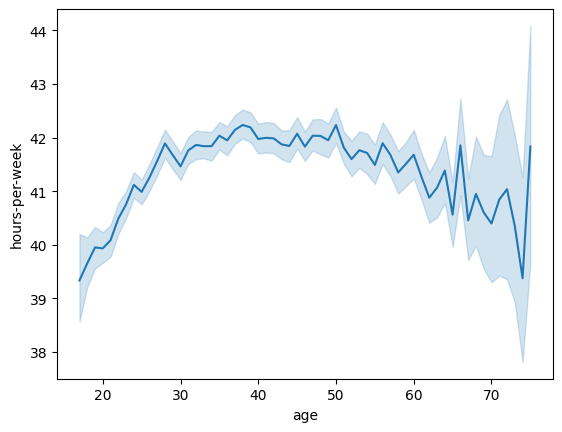

In [56]:
sns.lineplot(x='age', y='hours-per-week', data=data)
plt.show()

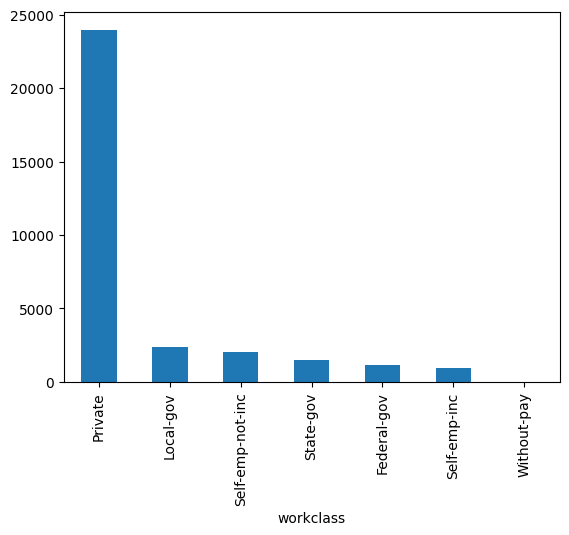

In [57]:
data['workclass'].value_counts().plot(kind='bar')
plt.show()

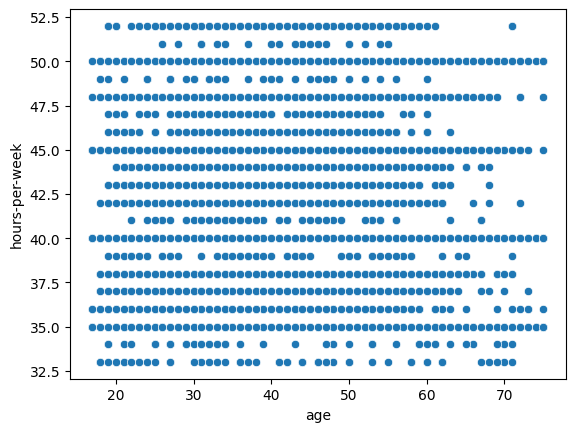

In [58]:
sns.scatterplot(x='age', y='hours-per-week', data=data)
plt.show()

C:\Users\DT User3\AppData\Local\Temp\ipykernel_3920\2754192329.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['<=50K', '>50K'])


[Text(0, 0, '23599'), Text(0, 0, '8381')]

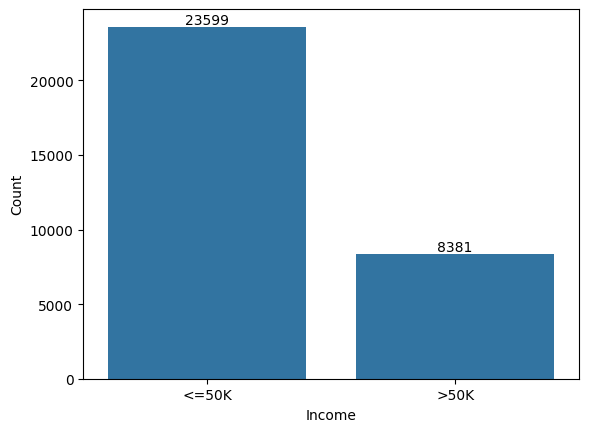

In [59]:
ax = sns.countplot(data=data, x='income')
ax.set_xticklabels(['<=50K', '>50K'])
ax.set_xlabel('Income')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0])

[Text(0, 0, '14909'), Text(0, 0, '7155')]

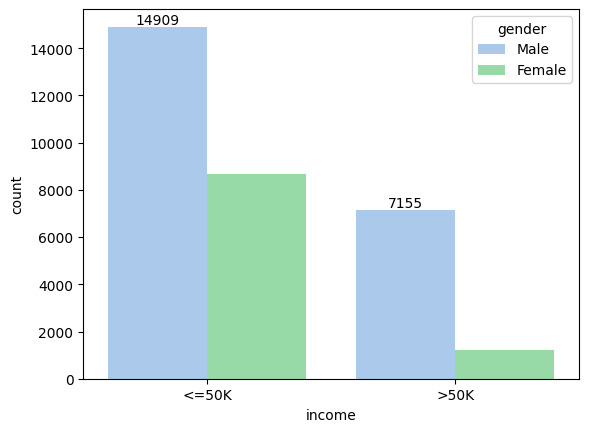

In [60]:
ax = sns.countplot(x=data['income'],palette='pastel6',hue='gender',data=data)
ax.bar_label(ax.containers[0])

<Axes: xlabel='income', ylabel='count'>

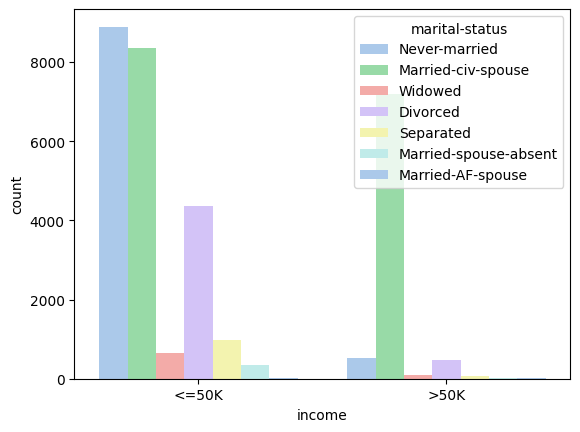

In [61]:
sns.countplot(x=data['income'],palette='pastel6',hue='marital-status',data=data)

<Axes: xlabel='income', ylabel='count'>

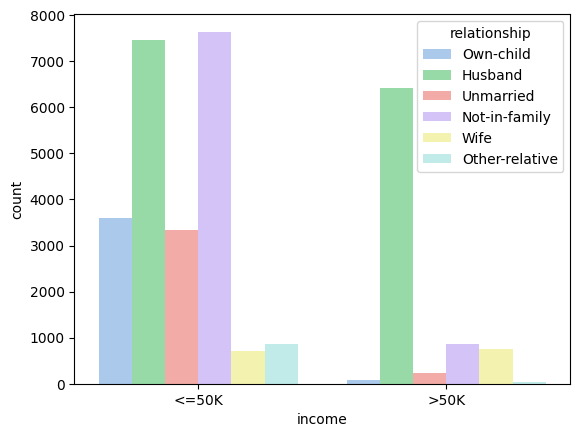

In [62]:
sns.countplot(x=data['income'],palette='pastel6',hue='relationship',data=data)

In [63]:
income_less_than_50k = data.loc[data.income == '<=50K']
income_more_than_50k = data.loc[data.income == '>50K']

Text(0.5, 1.0, 'Income-Based Age Distribution')

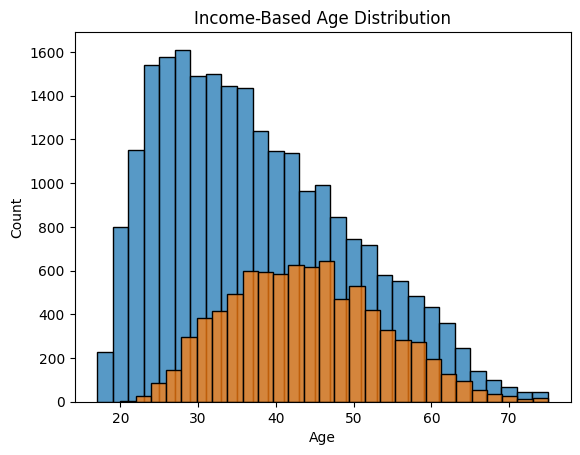

In [64]:
ax = sns.histplot(data=income_less_than_50k, x='age', binwidth=2)
ax = sns.histplot(data=income_more_than_50k, x='age', binwidth=2)
ax.set_xlabel('Age');
ax.set_title('Income-Based Age Distribution')

Text(0.5, 1.0, 'Income-Based Working Class Distribution')

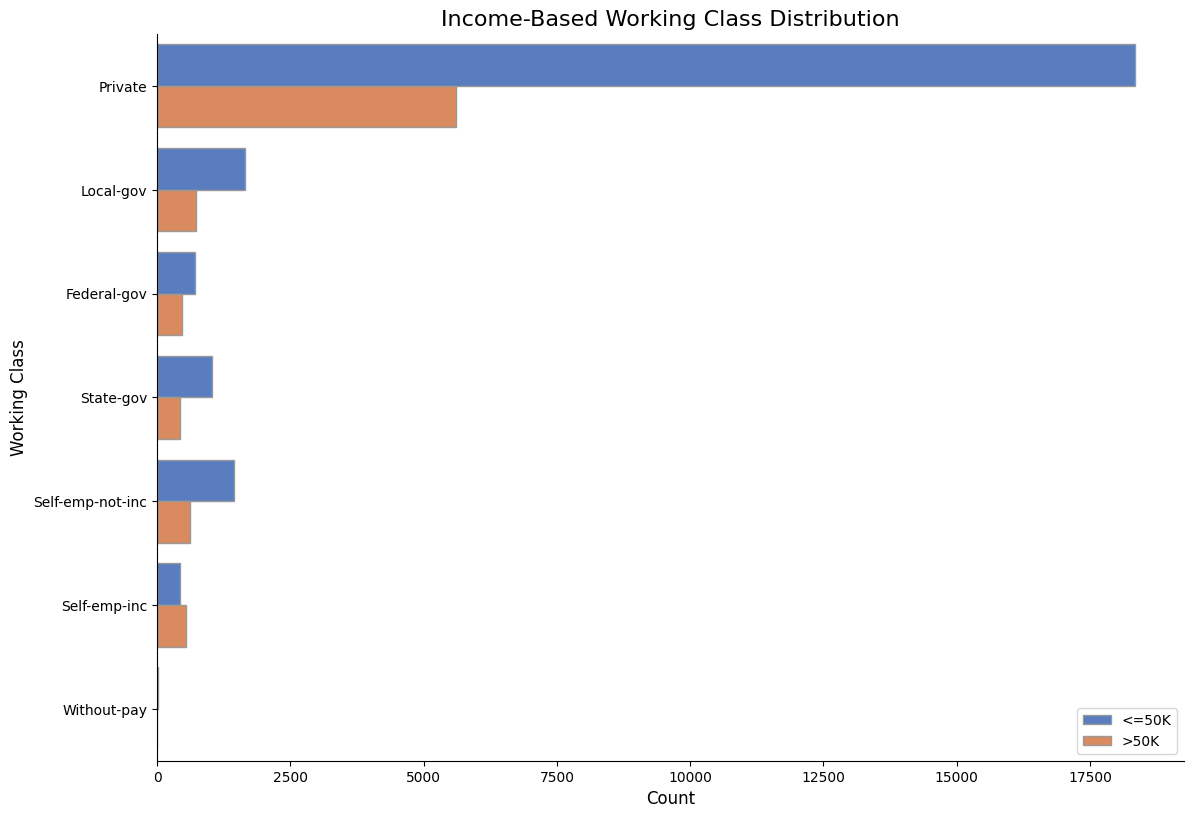

In [65]:
plot = sns.catplot(data=data, y="workclass", hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=8, aspect=1.5)
plot.set_xlabels('Count', fontsize=12)
plot.set_ylabels('Working Class', fontsize=12)
plt.legend(loc='lower right', labels=['<=50K', '>50K'])
plt.title('Income-Based Working Class Distribution', fontsize=16)

Text(0.5, 1.0, 'Income-Based Education Distribution')

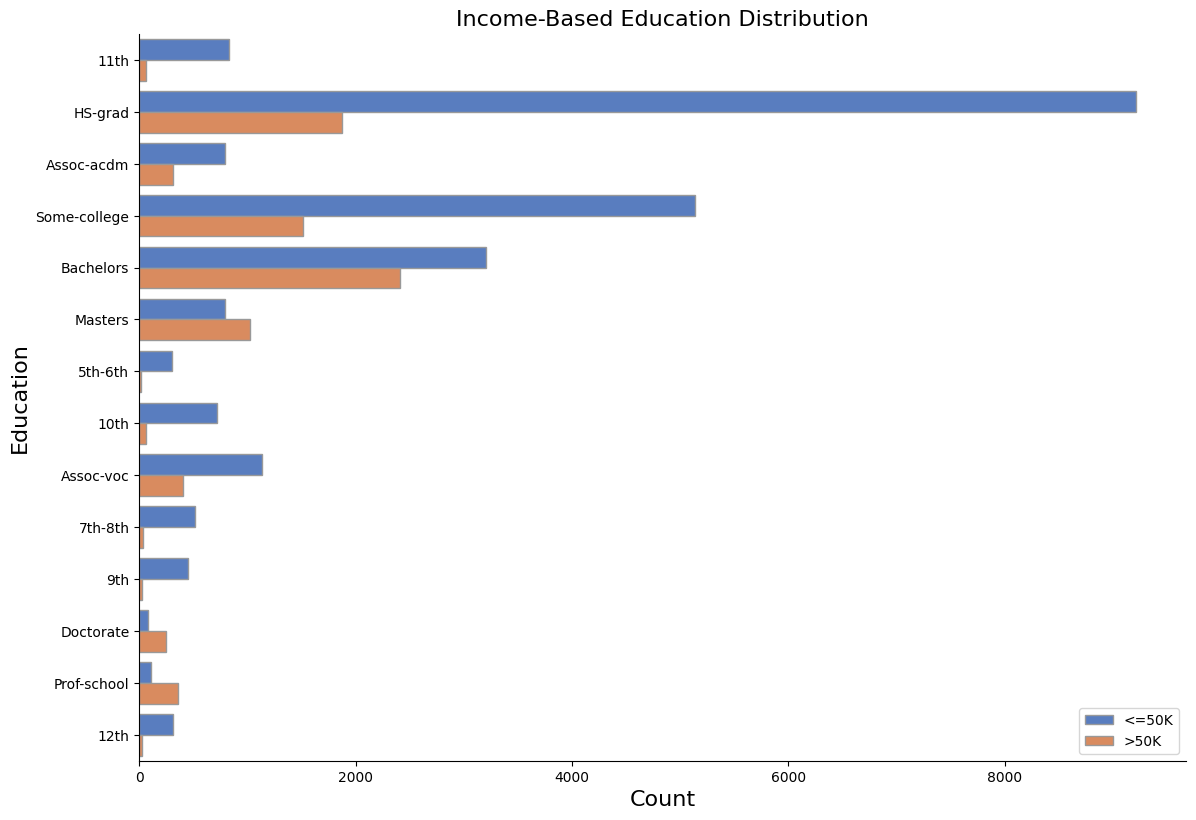

In [66]:
plot = sns.catplot(data=data, y="education", hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=8, aspect=1.5)
plot.set_xlabels('Count', fontsize=16)
plot.set_ylabels('Education', fontsize=16)
plt.legend(loc='lower right', labels=['<=50K', '>50K'])
plt.title('Income-Based Education Distribution', fontsize=16)

Text(0.5, 1.0, 'Income-Based Occupation Distribution')

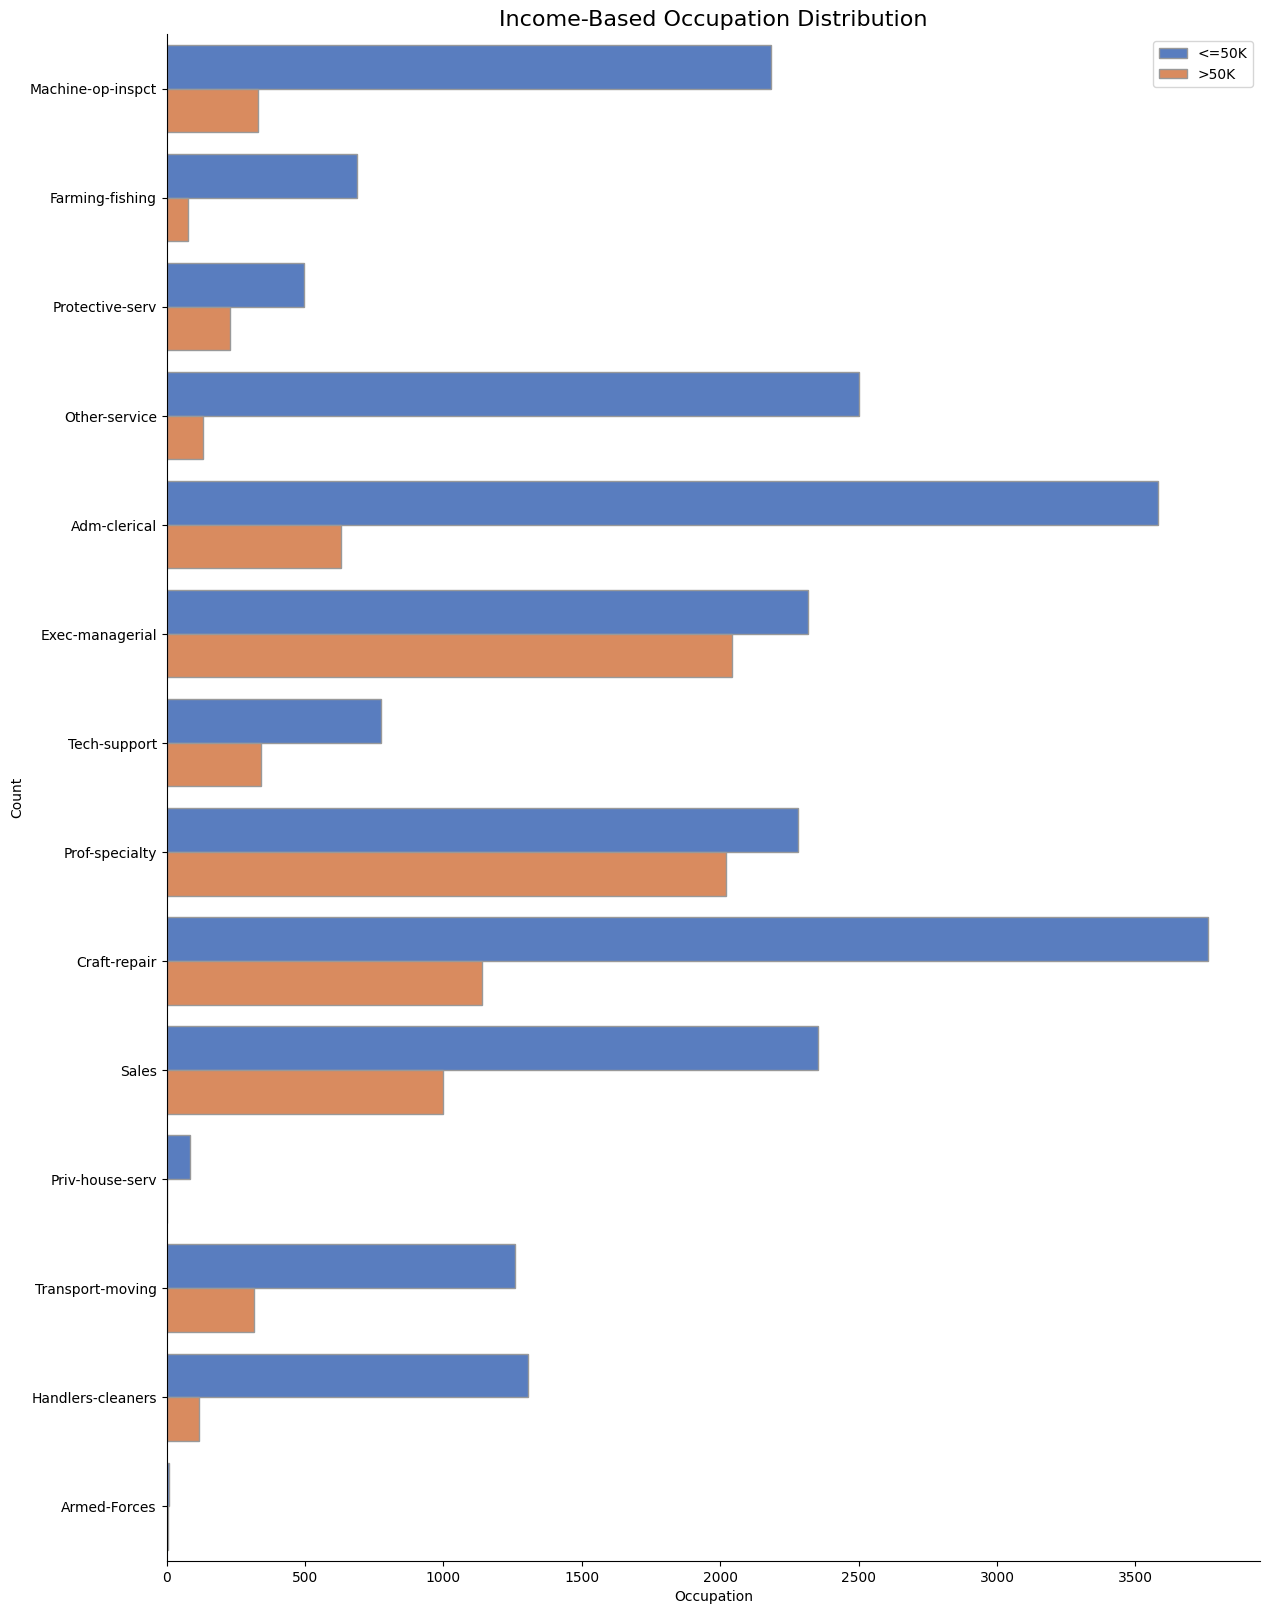

In [67]:
plot = sns.catplot(data=data, y='occupation', hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=16, aspect=.8, orient='v')
plot.set_xlabels('Occupation')
plot.set_ylabels('Count')
plt.legend(loc='upper right', labels=['<=50K', '>50K'])
plt.title('Income-Based Occupation Distribution', fontsize=16)